In [ ]:
# Instal required libraries
%pip install numpy_financial
%pip install pyomo
%pip install -q condacolab
import condacolab
condacolab.install()
# This step might fail or crash the first time you run it. This is fine. 
# Just run the cell again and it will work.
!conda install -c conda-forge glpk


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import os

In [ ]:
# Connect to the Google Drive so you can read the data
from google.colab import drive
drive.mount('/content/drive')

# Change directory to the folder containing the current script
os.chdir("/content/drive/MyDrive/HPP_EMS_Assignment")



### 1. Bidding strategy comparison

In [49]:

start_date_plot = datetime(2030,1,7)
end_date_plot = datetime(2031,1,1)
date_range_15min = pd.date_range(start_date_plot,end_date_plot,freq='15min')
date_range_1h = pd.date_range(start_date_plot,end_date_plot,freq='1h')

# DEMS
output_DEMS_schedule_ts_filename = './DEMS/schedule.csv'
DEMS_schedule = pd.read_csv(output_DEMS_schedule_ts_filename).iloc[:-96,:]
DEMS_schedule.index = date_range_15min[:-1]
P_bid_DEMS = DEMS_schedule['SM']

# SEMS
output_SEMS_schedule_ts_filename = './SEMS/schedule.csv'
SEMS_schedule = pd.read_csv(output_SEMS_schedule_ts_filename)
SEMS_schedule.index = date_range_15min[:-1]
P_bid_SEMS = SEMS_schedule['SM']


# DDEMS
output_DDEMS_schedule_ts_filename = './DDEMS/schedule.csv'
DDEMS_schedule = pd.read_csv(output_DDEMS_schedule_ts_filename)
DDEMS_schedule.index = date_range_15min[:-1]
P_bid_DDEMS = DDEMS_schedule['SM']


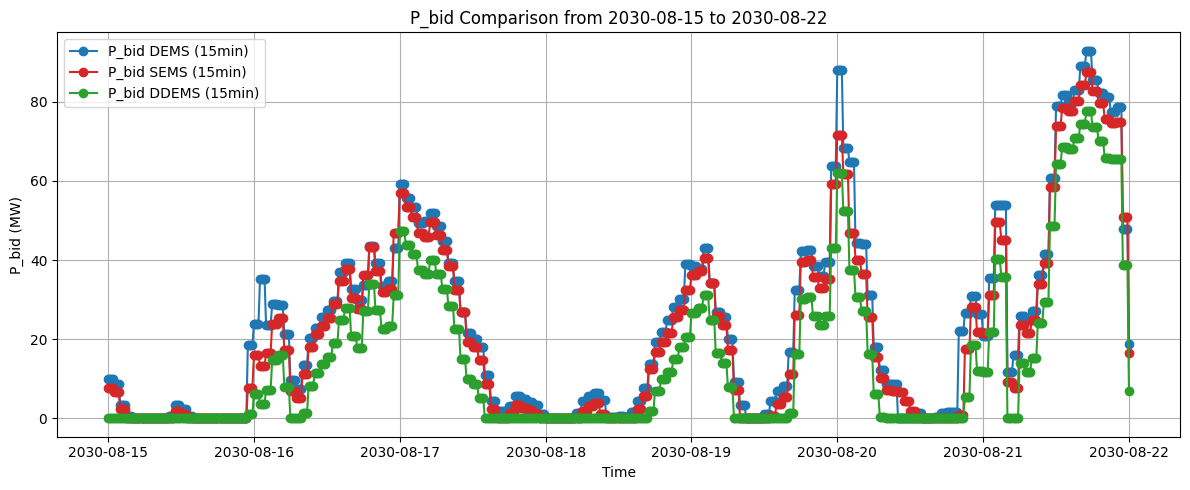

In [83]:
start_date = '2030-08-15'
end_date = '2030-08-22'


date_range_15min_mask = (P_bid_DEMS.index >= start_date) & (P_bid_DEMS.index <= end_date)




P_bid_DEMS_day = P_bid_DEMS[date_range_15min_mask]
P_bid_SEMS_day = P_bid_SEMS[date_range_15min_mask]
P_bid_DDEMS_day = P_bid_DDEMS[date_range_15min_mask]

plt.figure(figsize=(12, 5))

plt.plot(P_bid_DEMS_day, label='P_bid DEMS (15min)', color='tab:blue', marker='o')
plt.plot(P_bid_SEMS_day, label='P_bid SEMS (15min)', color='tab:red', marker='o')
plt.plot(P_bid_DDEMS_day, label='P_bid DDEMS (15min)', color='tab:green', marker='o')

plt.title(f'P_bid Comparison from {start_date} to {end_date}')
plt.xlabel('Time')
plt.ylabel('P_bid (MW)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Profits comparison

In [80]:
# DEMS
output_DEMS_revenue_ts_filename = './DEMS/revenue.csv'
DEMS_revenue = pd.read_csv(output_DEMS_revenue_ts_filename).iloc[:-4,:]

revenue_DEMS = DEMS_revenue['SM_revenue'] + DEMS_revenue['im_revenue'] - DEMS_revenue['Deg_cost_by_cycle']

# SEMS
output_SEMS_revenue_ts_filename = './SEMS/revenue.csv'
SEMS_revenue = pd.read_csv(output_SEMS_revenue_ts_filename).iloc[:-1,:]

revenue_SEMS = SEMS_revenue['SM_revenue'] + SEMS_revenue['im_revenue'] - SEMS_revenue['Deg_cost_by_cycle']


# DDEMS
output_DDEMS_revenue_ts_filename = './DDEMS/revenue.csv'
DDEMS_revenue = pd.read_csv(output_DDEMS_revenue_ts_filename)

revenue_DDEMS = DDEMS_revenue['SM_revenue'] + DDEMS_revenue['im_revenue'] - DDEMS_revenue['Deg_cost_by_cycle']





Annual Profits Summary:
DEMS   Profits: €12388606
SEMS   Profits: €12616773
DDEMS  Profits: €13017925


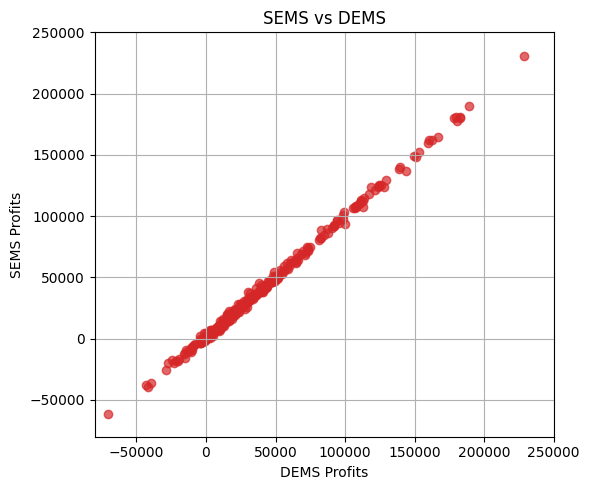

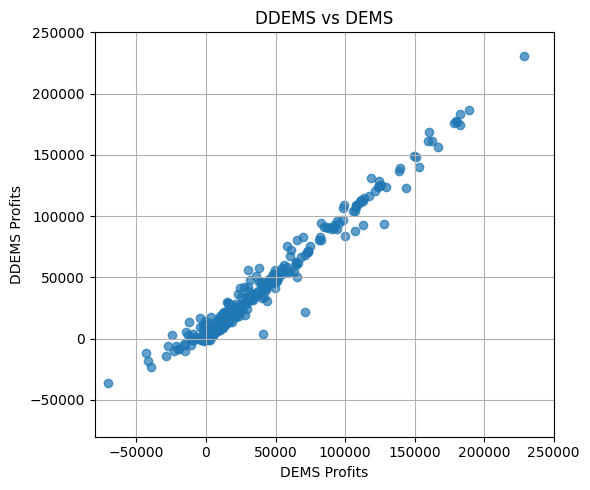

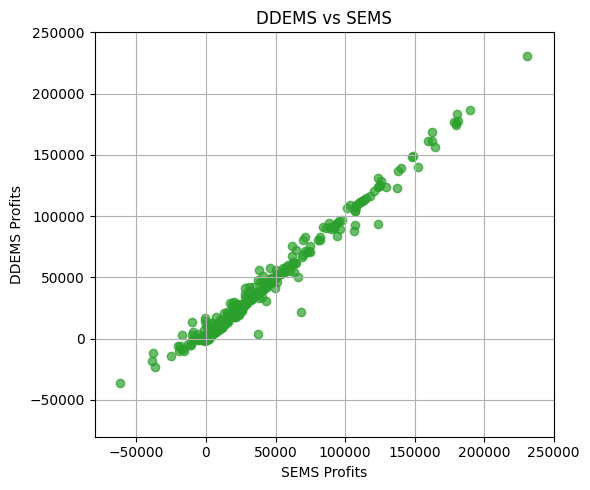

In [ ]:
annual_profit_DEMS = revenue_DEMS.sum()
annual_profit_SEMS = revenue_SEMS.sum()
annual_profit_DDEMS = revenue_DDEMS.sum()


print("Annual Profits Summary:")
print(f"DEMS   Profits: €{annual_profit_DEMS:.0f}")
print(f"SEMS   Profits: €{annual_profit_SEMS:.0f}")
print(f"DDEMS  Profits: €{annual_profit_DDEMS:.0f}")

x_min = -80000
x_max = 250000
plt.figure(figsize=(6, 5))
plt.scatter(revenue_DEMS, revenue_SEMS, alpha=0.7, color='tab:red')
plt.plot([x_min, x_max], [x_min, x_max], color='gray', linestyle='--', label='y = x') 
plt.xlabel('DEMS Profits')
plt.ylabel('SEMS Profits')
plt.title('SEMS vs DEMS')
plt.xlim([x_min,x_max])
plt.ylim([x_min,x_max])
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(revenue_DEMS, revenue_DDEMS, alpha=0.7, color='tab:blue')
plt.xlabel('DEMS Profits')
plt.ylabel('DDEMS Profits')
plt.title('DDEMS vs DEMS')
plt.xlim([x_min,x_max])
plt.ylim([x_min,x_max])
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 5))
plt.scatter(revenue_SEMS, revenue_DDEMS, alpha=0.7, color='tab:green')
plt.xlabel('SEMS Profits')
plt.ylabel('DDEMS Profits')
plt.title('DDEMS vs SEMS')
plt.xlim([x_min,x_max])
plt.ylim([x_min,x_max])
plt.grid(True)
plt.tight_layout()
plt.show()